In [81]:
import pandas as pd
xls = pd.ExcelFile('inout1ay.xlsx')
days=["Pazartesi","Salı","Çarşamba","Perşembe","Cuma","Cumartesi","Pazar"]
numbers=["","2","3","4"]
sheets=[]
for number in numbers:
    for day in days:
        sheets.append(day+number)

In [82]:
sheets

['Pazartesi',
 'Salı',
 'Çarşamba',
 'Perşembe',
 'Cuma',
 'Cumartesi',
 'Pazar',
 'Pazartesi2',
 'Salı2',
 'Çarşamba2',
 'Perşembe2',
 'Cuma2',
 'Cumartesi2',
 'Pazar2',
 'Pazartesi3',
 'Salı3',
 'Çarşamba3',
 'Perşembe3',
 'Cuma3',
 'Cumartesi3',
 'Pazar3',
 'Pazartesi4',
 'Salı4',
 'Çarşamba4',
 'Perşembe4',
 'Cuma4',
 'Cumartesi4',
 'Pazar4']

In [83]:
table_names=[]
for i in sheets:
    a="df_"+str(i)
    globals()[a]=pd.read_excel(xls, i)
    table_names.append(a)

In [84]:
table_names

['df_Pazartesi',
 'df_Salı',
 'df_Çarşamba',
 'df_Perşembe',
 'df_Cuma',
 'df_Cumartesi',
 'df_Pazar',
 'df_Pazartesi2',
 'df_Salı2',
 'df_Çarşamba2',
 'df_Perşembe2',
 'df_Cuma2',
 'df_Cumartesi2',
 'df_Pazar2',
 'df_Pazartesi3',
 'df_Salı3',
 'df_Çarşamba3',
 'df_Perşembe3',
 'df_Cuma3',
 'df_Cumartesi3',
 'df_Pazar3',
 'df_Pazartesi4',
 'df_Salı4',
 'df_Çarşamba4',
 'df_Perşembe4',
 'df_Cuma4',
 'df_Cumartesi4',
 'df_Pazar4']

In [85]:
def rename_column(df):
    df.rename(columns={df.columns[0]:"Hour"
                      ,df.columns[1]:"In or Out"},inplace=True)


for i in table_names:
    rename_column(globals()[i])
    

In [86]:
df_Salı4

,Hour,In or Out
0,08:27:11,1
1,08:27:17,1
2,08:27:18,0
3,08:27:24,1
4,08:27:27,1
...,...,...
3503,19:32:32,0
3504,19:32:53,0
3505,19:33:00,0
3506,19:33:11,0


In [87]:
import numpy as np
def change_zeros(df):
    df["In or Out"] = np.where(df["In or Out"] == 0, -1, 1)

    
    
for i in table_names:
    change_zeros(globals()[i])
    


- Datamız düzenli hale geldi. Şimdi 1 in tekrar sayısına bakarak en çok tekrar ettiği günleri bulup o günlerin en popüler gün olduğuna karar vericez.

In [88]:
occ=[]
for i in table_names:
    df_=globals()[i]
    occ_of_one=list(df_["In or Out"].value_counts())[1]   #[-1,1]
    occ.append(occ_of_one)

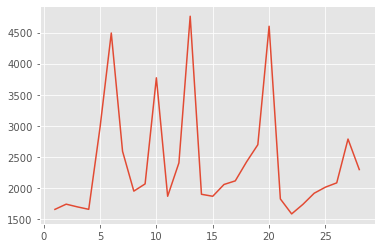

In [89]:
import matplotlib.pyplot as plt
plt.plot(list(range(1,len(table_names)+1)),occ)

Gördüğünüz gibi ayın 6'sı, 10'u, 13'ü ve 20'sinde gözle görülür pikler var. Bu o günlerdeki yoğunlaşmayı gösterir.

- Şimdi de haftanın günleri açısından bakalım.

In [90]:
len(occ)

28

In [91]:
pazt=occ[0]+occ[7]+occ[14]+occ[21]
sal=occ[1]+occ[8]+occ[15]+occ[22]
car=occ[2]+occ[9]+occ[16]+occ[23]
per=occ[3]+occ[10]+occ[17]+occ[24]
cum=occ[4]+occ[11]+occ[18]+occ[25]
cmt=occ[5]+occ[12]+occ[19]+occ[26]
pzr=occ[6]+occ[13]+occ[20]+occ[27]
day_based=[pazt,sal,car,per,cum,cmt,pzr]

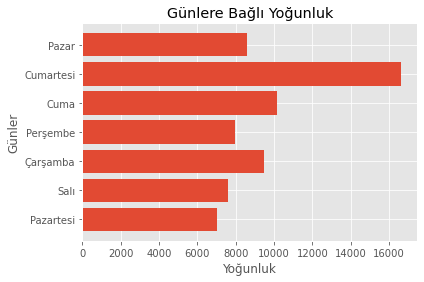

In [92]:
plt.style.use('ggplot')
plt.barh(days,day_based)
plt.title('Günlere Bağlı Yoğunluk')
plt.ylabel('Günler')
plt.xlabel('Yoğunluk')
plt.show()

- Cumartesi günü en yoğun gün olarak görünüyor. Bu gün Cuma, Çarşamba ve Pazar günleri tarafından takip ediliyor.

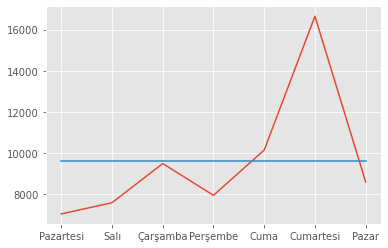

In [198]:
mean=sum(day_based)/7
men=[]
for i in range(7):
    men.append(mean)
plt.plot(days,day_based)
plt.plot(days,men)

- Gün bazlı ortalama yoğunluğumuz (mavi çizgi) ile genel yoğunluğumuz (kırmızı çizgi) arasındaki ilişki net bir şekilde görülüyor.

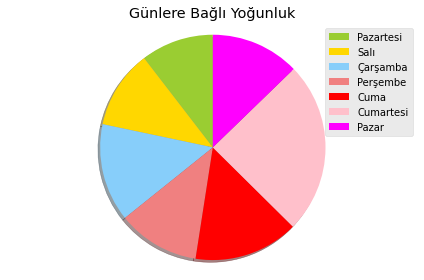

In [93]:
labels = days
sizes = day_based
colors = ['yellowgreen', 'gold', 'lightskyblue',
          'lightcoral',"red","pink","magenta"]
patches, texts = plt.pie(sizes, colors=colors, shadow=True, startangle=90)
plt.legend(patches, labels, loc="best")
plt.title("Günlere Bağlı Yoğunluk")
plt.axis('equal')
plt.tight_layout()
plt.show()

Cumartesi gününün dominansı pasta grafiğinden de gözlemleniyor.

In [94]:
df_Pazartesi

,Hour,In or Out
0,09:10:19,1
1,09:10:38,1
2,09:10:54,1
3,09:11:08,-1
4,09:11:17,1
...,...,...
3308,18:02:40,1
3309,18:02:47,-1
3310,18:03:01,-1
3311,18:03:17,-1


In [104]:
def norm(df):
    df["Hour"]=df["Hour"].astype("str").str[:2]
    
    
    
for i in table_names:
    norm(globals()[i])
    

In [113]:
for i in table_names:
    globals()[i]=globals()[i].groupby("Hour").sum()
    
df_Pazartesi

,In or Out
Hour,
09,8
10,3
11,-26
12,-6
13,23
14,-3
15,5
16,-7
17,-4


In [118]:
df = pd.concat([df_Pazartesi, df_Pazartesi2,df_Pazartesi3,
               df_Pazartesi4,df_Salı,df_Salı2,df_Salı3,df_Salı4,
            df_Çarşamba,df_Çarşamba2,df_Çarşamba3,df_Çarşamba4,
               df_Perşembe,df_Perşembe2,df_Perşembe3,df_Perşembe4,
               df_Cuma,df_Cuma2,df_Cuma3,df_Cuma4,
               df_Cumartesi,df_Cumartesi2,df_Cumartesi3,df_Cumartesi4,
                df_Pazar,df_Pazar2,df_Pazar3,df_Pazar4,
               ]).groupby('Hour')["In or Out"].sum().reset_index()

In [119]:
df

,Hour,In or Out
0,07,21
1,08,23
2,09,26
3,10,-101
4,11,56
5,12,-87
6,13,151
7,14,72
8,15,-163
9,16,61


Text(0.5, 1.0, 'Saatlik Yoğunluk')

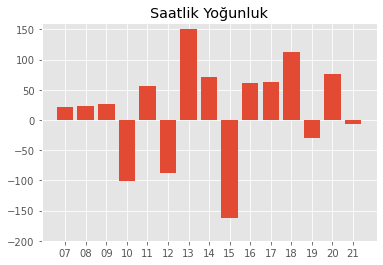

In [141]:
plt.bar(df["Hour"],df["In or Out"])
plt.ylim(-200,160)
plt.title("Saatlik Yoğunluk")

(-200.0, 160.0)

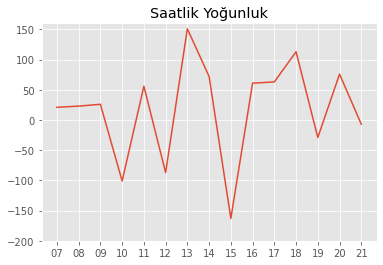

In [140]:
plt.plot(df["Hour"],df["In or Out"])
plt.title("Saatlik Yoğunluk")
plt.ylim(-200,160)

- Grafiklerden anlaşılacağı üzere saat 11, 13, 18 civarları en yoğun saatler iken 10, 12 ve 15 civarlarında yoğunlukta ciddi bir düşüş görülmektedir.

In [188]:
mean=[]
for i in range(15):
    mean.append(int(df["In or Out"].mean()))

mean=pd.DataFrame(mean)
df["Mean"]=mean

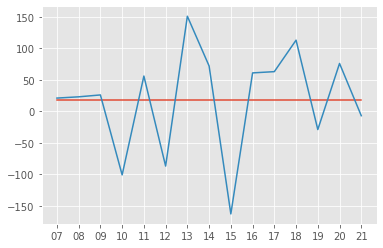

In [195]:
plt.plot(df.Hour,df["Mean"])
plt.plot(df.Hour,df["In or Out"])

- Görüldüğü gibi ortalama yoğunluğumuz 18 civarı(kırmızı çizgi) mavi grafik ise saatlere göre yoğunluğu göstermektedir.